### Ordinary derivative of the function

- The definition of the derivative of the function **f** at the point **x**.
- Represents the limit of the average rate of change (or average slope) of the function as the interval
h approaches zero.
- The process of finding this limit is known as differentiation
- Limit, if it exists, gives you the instantaneous rate of change of the function at **x**
- The process of finding this limit is known as differentiation.


![derivative](./img/derivative_of_the%20function.png)


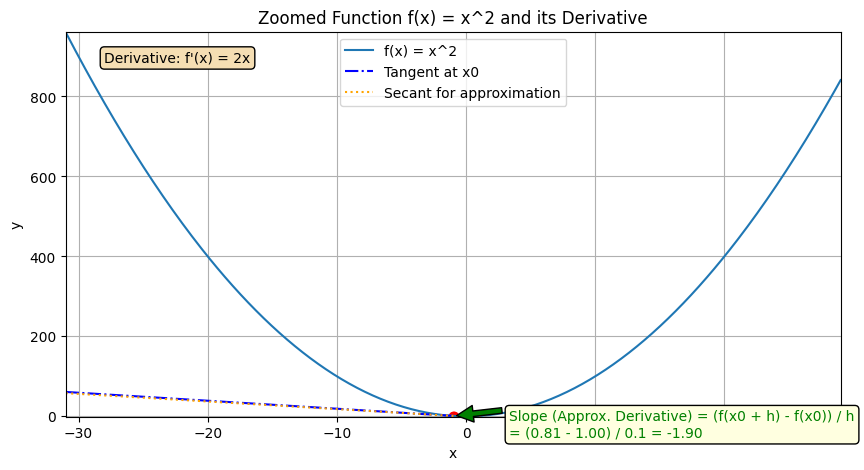

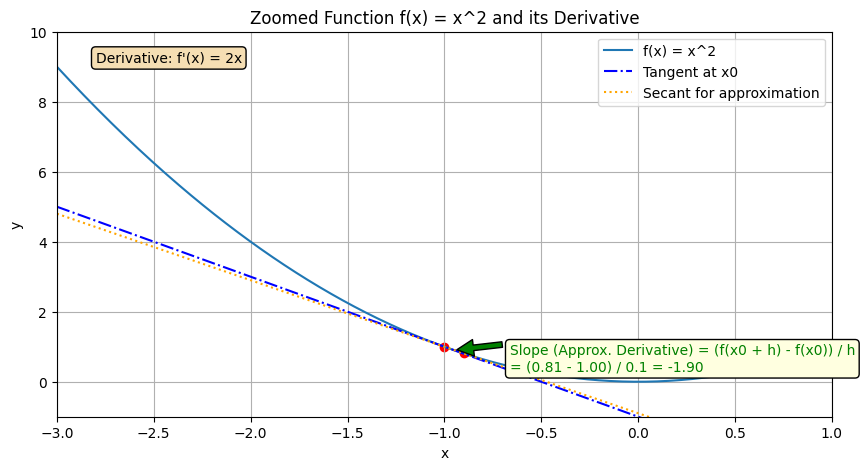

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def quadratic_fun(x):
    return x ** 2

# Define the actual derivative of the function using the Power Rule.
# For f(x) = x^2, the derivative f'(x) = 2x.
def actual_derivative_quad_fun(x):
    return 2 * x

# Define the derivative using the limit definition.
# This function approximates the derivative numerically using a small h value.
# It applies the difference quotient method to estimate the slope (derivative)
# of the function f at a specific point x.
def approximate_derivative(f, x, h=1e-5):
    return (f(x + h) - f(x)) / h

def plot_function_and_derivative_zoomed(f, actual_derivative, approx_deriv, x0, h, zoom_factor):
    # Generate x values around x0
    x = np.linspace(x0 - zoom_factor, x0 + zoom_factor, 400)
    y = f(x)
   # dy = actual_derivative(x)
    
    # Compute the tangent line at x0
    tangent_actual = actual_derivative(x0) * (x - x0) + f(x0)
    
    # Compute the slope of the secant line for the approximate derivative
    slope_secant = (f(x0 + h) - f(x0)) / h

    # Extend the secant line across the plotted range
    secant_line = slope_secant * (x - x0) + f(x0)

    # Plot the function, derivative, and tangent line
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, label='f(x) = x^2')
    plt.plot(x, tangent_actual, label="Tangent at x0", linestyle='-.', color='blue')
    plt.plot(x, secant_line, label="Secant for approximation", linestyle=':', color='orange')
    
    # Highlight the points used for the secant line
    plt.scatter([x0, x0 + h], [f(x0), f(x0 + h)], color='red')
    plt.text(0.05, 0.95, "Derivative: f'(x) = 2x", horizontalalignment='left', verticalalignment='top', transform=plt.gca().transAxes, fontsize=10, bbox=dict(boxstyle="round", facecolor='wheat', edgecolor='black'))

    # Annotate the slope of the secant line in green
    approx_deriv_formula = f"Slope (Approx. Derivative) = (f(x0 + h) - f(x0)) / h\n= ({f(x0 + h):.2f} - {f(x0):.2f}) / {h} = {slope_secant:.2f}"
    plt.annotate(approx_deriv_formula,
             xy=(x0 + h / 2, (f(x0) + f(x0 + h)) / 2), xycoords='data',
             xytext=(40, -15), textcoords='offset points',
             arrowprops=dict(facecolor='green', shrink=0.05),
             fontsize=10, color='green', bbox=dict(boxstyle="round", facecolor='lightyellow', edgecolor='black'))

    plt.title("Zoomed Function f(x) = x^2 and its Derivative")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    
    # Adjust the limits based on the zoom factor
    plt.xlim(x0 - zoom_factor, x0 + zoom_factor)
    plt.ylim(min(y) - 1, max(y) + 1)
    
    plt.show()

# Example usage
x0 = -1  # Point at which we want to calculate the derivative
h = 0.1    # Step size for the secant line calculation

# Calculate the approximate derivative at x0 using a small h value
approx_deriv = approximate_derivative(quadratic_fun, x0, h)

# Plot with a larger zoom factor
plot_function_and_derivative_zoomed(quadratic_fun, actual_derivative_quad_fun, approx_deriv, x0, h, zoom_factor=30)

# Plot with a smaller zoom factor
plot_function_and_derivative_zoomed(quadratic_fun, actual_derivative_quad_fun, approx_deriv, x0, h, zoom_factor=2)


### Partial derivative example

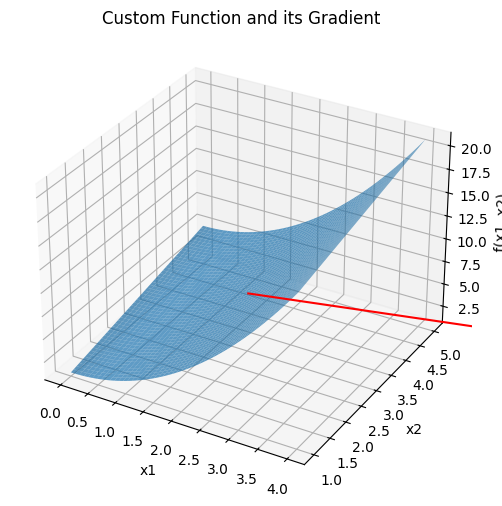

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the quadratic function with two variables
def custom_fun(x1, x2):
    return x1 ** 2 + x2

#TODO def full_derivative    

# Define the actual partial derivative of the function with respect to x1.
def actual_partial_derivative_x1(x1):
    return 2 * x1

# Define the actual partial derivative of the function with respect to x2.
def actual_partial_derivative_x2(x2):
    return 1

# Define the gradient of the function
def gradient_function(x1, x2):
    return np.array([actual_partial_derivative_x1(x1), actual_partial_derivative_x2(x2)])

# Plot the function and its gradient
def plot_function_and_gradient(f, gradient, x0, y0, zoom_factor):
    x = np.linspace(x0 - zoom_factor, x0 + zoom_factor, 400)
    y = np.linspace(y0 - zoom_factor, y0 + zoom_factor, 400)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface
    ax.plot_surface(X, Y, Z, alpha=0.7)

    # Calculate and plot the gradient vector at (x0, y0)
    grad = gradient(x0, y0)
    ax.quiver(x0, y0, f(x0, y0), grad[0], grad[1], 0, length=10, color='red')

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x1, x2)')
    ax.set_title("Custom Function and its Gradient")

    plt.show()

# Example usage
x0 = 2  # x1 value
y0 = 3  # x2 value

plot_function_and_gradient(custom_fun, gradient_function, x0, y0, zoom_factor=2)
